# **About Dataset**

The dataset consists of lists of unique objects of popular portals for the sale of real estate in Russia. More than 540 thousand objects.
The dataset contains 540000 real estate objects in Russia.

The Russian real estate market has a relatively short history. In the Soviet era, all properties were state-owned; people only had the right to use them with apartments allocated based on one's place of work. As a result, options for moving were fairly limited. However, after the fall of the Soviet Union, the Russian real estate market emerged and Muscovites could privatize and subsequently sell and buy properties for the first time. Today, Russian real estate is booming. It offers many exciting opportunities and high returns for lifestyle and investment.
The real estate market has been in a growth phase for several years, which means that you can still find properties at very attractive prices, but with good chances of increasing their value in the future.

date - date of publication of the announcement;

time - the time when the ad was published;

geo_lat - Latitude

geo_lon - Longitude

region - Region of Russia. There are 85 subjects in the

country in total.

building_type - Facade type. 0 - Other. 1 - Panel. 2 -

Monolithic. 3 - Brick. 4 - Blocky. 5 - Wooden

object_type - Apartment type. 1 - Secondary real estate market; 2 - New building;

level - Apartment floor

levels - Number of storeys
rooms - the number of living rooms. If the value is "-1", then it means "studio apartment"


https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

from tqdm import tqdm

from sklearn import tree
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer,  KNNImputer

from sklearn.preprocessing import (MinMaxScaler,
                                   StandardScaler,
                                   RobustScaler,
                                   Normalizer,
                                   PolynomialFeatures,
                                   LabelEncoder,
                                   OneHotEncoder,
                                   OrdinalEncoder)

from sklearn.model_selection import (cross_val_score,
                                     KFold,
                                     StratifiedShuffleSplit,
                                     GridSearchCV,
                                     StratifiedKFold,
                                     cross_validate)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import (precision_score,
                             accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             PrecisionRecallDisplay)

from IPython.display import HTML
style = "<style>svg{width: 15% !important;height:15% !important;}</style>"
HTML(style)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/all_v2.csv')

In [ ]:
data

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661.0,1.0,8.0,10.0,3.0,82.6,10.8,1.0
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81.0,3.0,5.0,24.0,2.0,69.1,12.0,1.0
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871.0,1.0,5.0,9.0,3.0,66.0,10.0,1.0
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843.0,4.0,12.0,16.0,2.0,38.0,5.0,11.0
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81.0,3.0,13.0,14.0,2.0,60.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282395,3849000,2018-10-16,15:27:02,55.451124,37.543867,81.0,1.0,3.0,17.0,1.0,33.8,8.0,1.0
282396,3700000,2018-10-16,15:27:10,56.008935,37.829878,81.0,3.0,4.0,5.0,2.0,44.4,6.0,1.0
282397,4200000,2018-10-16,15:27:10,59.741935,30.478070,2661.0,2.0,1.0,9.0,2.0,62.4,10.0,1.0
282398,1400000,2018-10-16,15:27:29,45.013243,39.079527,2843.0,3.0,7.0,18.0,1.0,43.0,11.0,1.0


In [ ]:
data.isna().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          1
region           1
building_type    1
level            1
levels           1
rooms            1
area             1
kitchen_area     1
object_type      1
dtype: int64

Так как у нас буквально несколько строк пропущенными значениями, можно позволить их полностью удалить — роли никакой это не сыграет.

In [ ]:
data = data.dropna()

In [ ]:
data[data['price'] < 0]

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
43821,-1633967296,2018-09-14,10:48:27,57.983337,56.216044,5520.0,1.0,13.0,22.0,1.0,38.92,17.26,11.0
43822,-1633967296,2018-09-14,10:48:27,57.983337,56.216044,5520.0,1.0,14.0,22.0,1.0,38.92,17.26,11.0
199895,-429242296,2018-10-04,09:21:35,55.038734,82.985600,9654.0,2.0,5.0,25.0,2.0,57.27,9.31,11.0
208483,-1744967296,2018-10-06,05:06:46,54.991330,82.882575,9654.0,3.0,4.0,5.0,2.0,45.00,6.00,1.0
234799,-2053850296,2018-10-10,06:32:39,55.013994,83.003319,9654.0,1.0,2.0,10.0,3.0,87.39,12.92,11.0
239199,-2053850296,2018-10-10,13:11:09,55.013994,83.003319,9654.0,1.0,2.0,10.0,3.0,87.39,12.92,11.0
330731,-897167296,2018-10-23,09:54:08,54.941751,82.882772,9654.0,2.0,3.0,17.0,3.0,80.90,10.05,11.0
400760,-1854967296,2018-11-02,11:40:29,55.035041,82.963958,9654.0,0.0,15.0,19.0,1.0,32.30,9.62,1.0
412795,-44967296,2018-11-04,14:26:58,60.057527,30.469373,3446.0,1.0,1.0,18.0,2.0,56.00,10.00,1.0
445500,-2114150296,2018-11-09,01:47:08,55.017756,83.003578,9654.0,1.0,2.0,10.0,3.0,87.00,13.00,11.0


В наших исходных данных можно заметить, что у некоторых позиций цена на недвижимость является отрицательной или же очень низкой (с логической точки зрения является абсурдом и уже не говорю о том, что такие вещи могут повлиять на качество нашей модели).

Поэтому следует определить более-менее разумный ценовой порог, от которого и будем в дальнейшем отталкиваться. Так мы сразу избавимся от отрицательных и очень низких значений цены.

PS: price обозначается рублями.

Поискав информацию в интернете, можно сослаться на сайт с исследованиями по рынку недвижимости и взять в качестве порога значение 1.38 миллиона для переменной price.

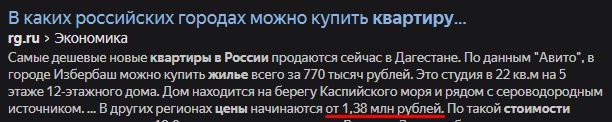

In [ ]:
new_data = data[data['price'] > 1380000]
new_data['price'] = round(new_data[['price']] / 1000000, 2)

In [38]:
new_data

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6.05,2018-02-19,20:00:21,59.805808,30.376141,2661.0,1.0,8.0,10.0,3.0,82.6,10.8,1.0
1,8.65,2018-02-27,12:04:54,55.683807,37.297405,81.0,3.0,5.0,24.0,2.0,69.1,12.0,1.0
2,4.00,2018-02-28,15:44:00,56.295250,44.061637,2871.0,1.0,5.0,9.0,3.0,66.0,10.0,1.0
3,1.85,2018-03-01,11:24:52,44.996132,39.074783,2843.0,4.0,12.0,16.0,2.0,38.0,5.0,11.0
4,5.45,2018-03-01,17:42:43,55.918767,37.984642,81.0,3.0,13.0,14.0,2.0,60.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282393,4.40,2018-10-16,15:26:41,55.834910,37.240150,81.0,2.0,2.0,6.0,1.0,34.0,8.5,1.0
282395,3.85,2018-10-16,15:27:02,55.451124,37.543867,81.0,1.0,3.0,17.0,1.0,33.8,8.0,1.0
282396,3.70,2018-10-16,15:27:10,56.008935,37.829878,81.0,3.0,4.0,5.0,2.0,44.4,6.0,1.0
282397,4.20,2018-10-16,15:27:10,59.741935,30.478070,2661.0,2.0,1.0,9.0,2.0,62.4,10.0,1.0


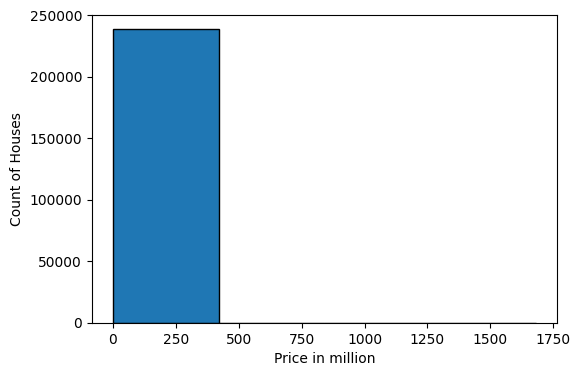

In [12]:
plt.figure(figsize=(6, 4))
plt.hist(new_data['price'], bins = 4, ec='black')
plt.xlabel('Price in million')
plt.ylabel('Count of Houses')
plt.show()

Из гистограммы выше можно заметить, что в наших данных имеется хорошо выраженный жирный хвост, который образует серьёзные выбросы. Собственно, ни о каком нормальном распределении здесь и речи идти не может. Несмотря на всё это, можно хоть как-то исправить положение путём трансформации наших данных — возведём price в натуральный логарифм; и, как вариант, — исключить из датафрейма буквально доли процента нашего показателя (то бишь сам хвост).

Примерно такую долю от всех наших данных составляют дома со стоимостью больше 500 миллионов рублей:

In [13]:
len(new_data[new_data['price'] > 500]) * 100 / len(new_data)

0.015502511825902602

Воспользуемся логарифмической трансформацией, чтобы поправить наше распределение:

In [14]:
new_data['price'].skew()

65.53768888803653

In [15]:
update_price = new_data[new_data['price'] < 500]
y_log = np.log(update_price['price'])

y_log.tail()

282393    1.481605
282395    1.348073
282396    1.308333
282397    1.435085
282398    0.336472
Name: price, dtype: float64

In [16]:
y_log.skew()

1.2057594020722981

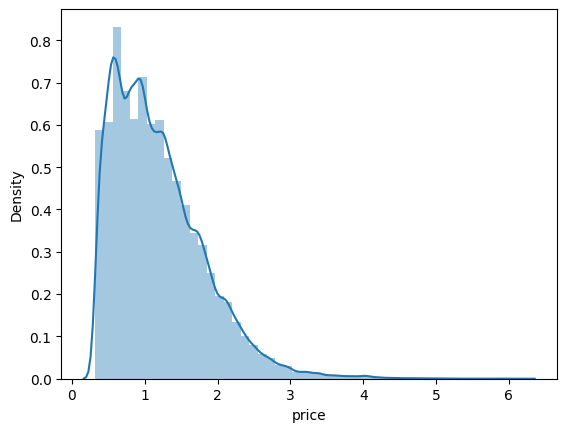

In [17]:
sns.distplot(y_log)
plt.show()

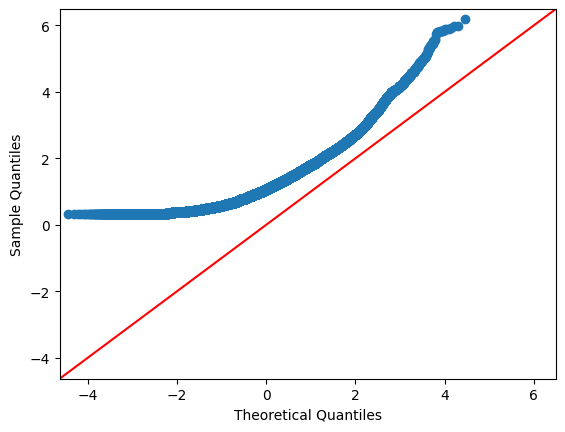

In [18]:
import statsmodels.api as sm

fig = sm.qqplot(y_log, line='45')
plt.show()

Так выглядит наше распределение после трансформации. В любом случае у нас по-прежнему остаётся заметно выраженная ассиметрия (особенно заметная на графике qqplot), но с этим мы уже ничего не поделаем. Будем пытаться работать с тем, что у нас есть.

Построим матрицу зависимостей предикторов между собой:

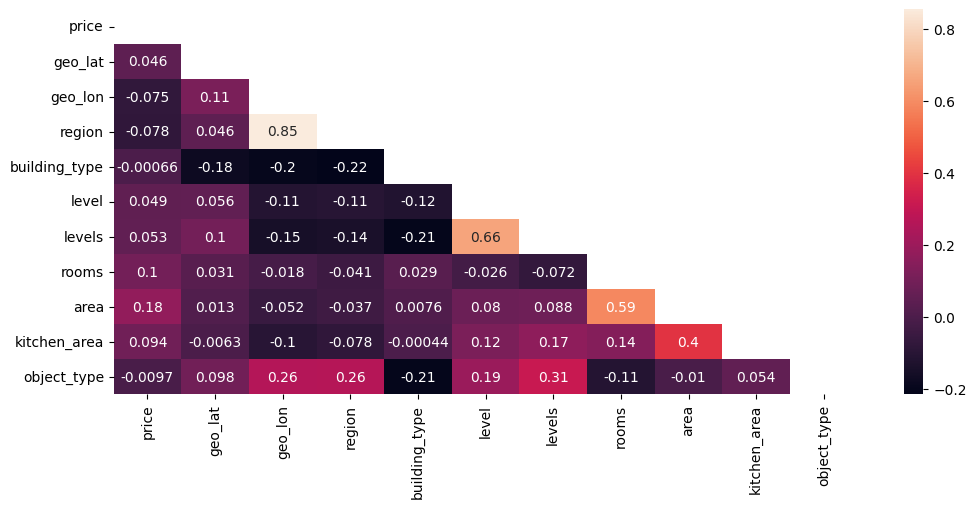

In [19]:
mask = np.zeros_like(update_price.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(12, 5))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size' : 10})
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

В наших данных прослеживается проблема мультиколлинеарности (когда независимые переменные хорошо коррелируют между собой).

Если степень корреляции между переменными достаточно высока, это может вызвать проблемы при подгонке и интерпретации регрессионной модели.

В нашем случае они не предоставляют уникальную или независимую информацию в регрессионной модели. Будем обращать внимание на те предикторы, у которых коэфициент корреляции в матрице составляет от 0.6.

Пример взаимосвязи (мультиколлинеарности) независимой переменной level с levels:

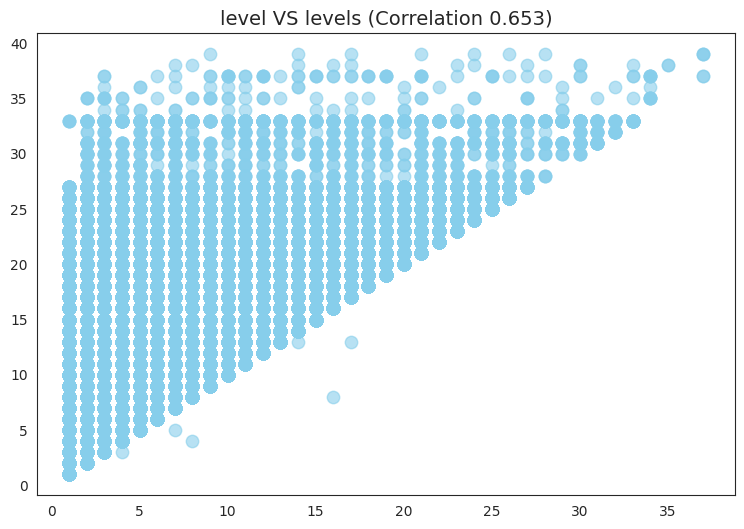

In [20]:
rm_tgt_corr = round(update_price['level'].corr(update_price['levels']), 3)

plt.figure(figsize = (9, 6))
plt.scatter(x = update_price['level'], y = update_price['levels'], alpha = 0.6, s = 80, color = 'skyblue')

plt.title(f'level VS levels (Correlation {rm_tgt_corr})', fontsize = 14)
plt.show()

Для себя предварительно подмечаем переменные: **region** (коррелирует с **geo_lut**), **levels** (коррелирует с **level**), **area** (коррелирует с **rooms**). Также можно заметить, что у нас отсутствует ярко-выраженный предиктор, который бы коррелировал с нашей зависимой переменной (price). Можно попытаться предположить, что на значение price влияет совокупность конкретных независимых переменных.

Мы будем работать с multiple linear regression. Сперва обучим модель на исходных переменных, чтобы посмотреть на коэфициент r2 (чем он больше, тем лучше), а уже потом начнём вычленять лишние предикторы, которые влияют на мультиколлинеарность.

In [21]:
prices = update_price['price']
features = update_price.drop(['price', 'date', 'time'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.3, random_state = 42)

In [22]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Training data r-squared: 0.29139772168744615
Test data r-squared: 0.29080365543277753


Сейчас у нас довольно низкий показатель метрики r2, но это можно исправить! Ранее мы уже работали с логарифмической трансформацией нашей зависимой переменной и убедились, что распределение хоть и имеет ассиметрию, но оно стало лучше, по сравнению с исходным вариантом. Теперь попробуем для обучения использовать нашу переменную price, возведённую в натуральный логарифм.

In [23]:
prices = np.log(update_price['price'])
features = update_price.drop(['price', 'date', 'time'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.3, random_state = 42)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

pd.DataFrame(data = regr.coef_, index=X_train.columns, columns = ['coef'])

Training data r-squared: 0.5474272986400159
Test data r-squared: 0.526602082061216


,coef
geo_lat,0.030137
geo_lon,-0.005663
region,-0.000037
building_type,0.011646
level,0.001114
levels,0.023760
rooms,0.111718
area,0.007412
kitchen_area,0.011794
object_type,-0.016279


Совсем другая картина! С помощью логарифма показатель r2 увеличился в 2 раза, что является очень хорошим результатом. В дальнейшем будем пробовать выкидывать лишние переменные, которые сильно не повлияют на нашу метрику качества модели — коэфициент детерминации. Правда в наших данных, как уже ранее говорилось, нет такой переменной, которая бы сильно зависела от показателя price (все переменные +- равны по значимости исходя из таблицы выше). Но так или иначе попробуем поиграться в надежде ещё сильнее оптимизировать наш результат.

Посмотрим на важность параметров вместе с p-уровнем значимости. Никакой показатель из них не оказался статистически значимым (больше 0.05).

In [24]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef' : results.params, 'p-value' : round(results.pvalues)})

,coef,p-value
const,-1.002844,0.0
geo_lat,0.030137,0.0
geo_lon,-0.005663,0.0
region,-0.000037,0.0
building_type,0.011646,0.0
level,0.001114,0.0
levels,0.023760,0.0
rooms,0.111718,0.0
area,0.007412,0.0
kitchen_area,0.011794,0.0


Проверяем параметр VIF. Наша задача, чтобы переменные не превышали порог 5.

In [25]:
X_incl_const = sm.add_constant(X_train)

vif = [variance_inflation_factor (exog = X_incl_const.values,
                                  exog_idx = i) for i in range (X_incl_const.shape[1])]

pd.DataFrame({'coef_name' : X_incl_const.columns, 'vif' : np.around(vif, 3)})

,coef_name,vif
0,const,157.583
1,geo_lat,1.061
2,geo_lon,3.655
3,region,3.600
4,building_type,1.109
5,level,1.744
6,levels,2.049
7,rooms,1.653
8,area,1.937
9,kitchen_area,1.315


Приступим к упрощению нашей модели, будем ориентироваться на показатель BIC (чем он меньше, тем и лучше). Наша задача заключается в том, чтобы уменьшить этот показатель, но при этом сильно не навредить коэфициенту детерминации (r2).

update. Оптимальным показателем BIC оказался датафрейм со всеми нашими предиктороами. При удалении любой независимой переменной, BIC возрастает, а коэфициент детерменации уменьшается.

In [26]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef' : results.params, 'p-value' : round(results.pvalues, 4)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 188379.90201152264
r-squared is 0.5474272986400162


Посмотрим на наши остатки (разница между значениями, которая предсказала наша модель и значениями, которые изначально мы ей дали).

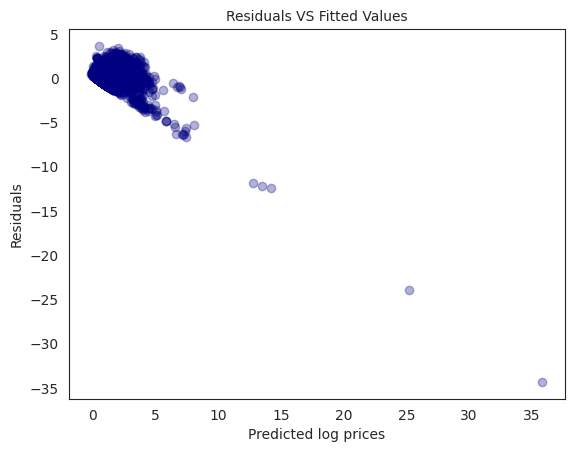

In [27]:
prices = np.log(update_price['price'])
features = update_price.drop(['price', 'date', 'time'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size = 0.2, random_state = 10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

plt.scatter(x = results.fittedvalues, y = results.resid, c = 'navy', alpha = 0.3)

plt.xlabel('Predicted log prices', fontsize = 10)
plt.ylabel('Residuals', fontsize = 10)
plt.title('Residuals VS Fitted Values', fontsize = 10)

plt.show()

Смотрим на нашу написанную модель в действии. Было взято 10 позиций из тестовой группы, на которых мы предсказали показатель price на основе независимых переменных и сравнили его с фактическим значением цены (числа в таблице указаны в натуральном логарифме).

In [37]:
prices = np.log(update_price['price'])
features = update_price.drop(['price', 'date', 'time'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.3, random_state = 42)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

real = round(pd.Series((np.array(y_test.tail(10)))), 2)
predict = round(pd.Series(regr.predict(X_test.tail(10))), 2)

pd.DataFrame({'real' : real, 'predict' : predict, 'error' : abs(real - predict)})

Training data r-squared: 0.5474272986400159
Test data r-squared: 0.526602082061216


,real,predict,error
0,1.24,0.98,0.26
1,2.28,1.41,0.87
2,0.41,1.30,0.89
3,1.34,1.49,0.15
4,0.34,0.57,0.23
5,0.64,0.96,0.32
6,0.81,0.85,0.04
7,1.52,1.32,0.20
8,0.89,1.56,0.67
9,0.63,1.12,0.49


# Итог:

Для предсказания цены дома была взята модель машинного обучения — множественная линейная регрессия. Возможно, не самый удачно подобранный метод, так как на выходе мы добились не столь большого коэфициента r2 — 0.52 на тестовых данных. Пожалуй, это максимум, который получилось вытянуть регрессией, имея не совсем удачное распределения зависимой переменной. Но учитывая, что в самом начале этот показатель был в два раза меньше, то выглядит очень даже неплохо. В таблице выше представлены результаты предсказания в сравнении с фактическими. Единственное для более трезвой оценки можно было бы применить, условный, метод деревей решений или случайного леса и уже посмотреть насколько наша регрессия хорошо по сравнению с другими моделями.